In [1]:
!pip install langgraph langsmith

In [2]:
!pip install langchain langchain_groq langchain_community

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
groq_api_key = os.environ.get("GROQ_API_KEY")
langsmith_token = os.environ.get("LANGSMITH_API_KEY") #tracing the activities
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"


In [12]:
from langchain_groq import ChatGroq

llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm


ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x11617bdf0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1161757f0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [13]:
###LANGGRAPH 

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import  StateGraph,START,END #statemanagement, start node and end node
from langgraph.graph.message import add_messages # one of the function to add messages, so state of the agent can be updated



In [14]:
class State(TypedDict): #inherited from TypedDict, which is a way to define the structure of the state
    messages:Annotated[list, add_messages]  #list of messages, which is a list , add messages is a function that will be used to add messages to the list
    #on every add, the state will be updated with the new message

graph_builder=StateGraph(State)

In [15]:
graph_builder

In [16]:
def chatbot(state:State):
    return {"messages":llm.invoke(state["messages"])}  #invoke the llm with the messages in the state, and return the messages

In [ ]:
graph_builder.add_node("chatbot", chatbot)  #add the chatbot node to the graph, which will be used to process the messages

In [21]:
graph_builder

In [23]:
graph_builder.add_edge(START, "chatbot")  #add an edge from the start node to the chatbot node, which will be used to process the messages
graph_builder.add_edge("chatbot", END)  #add an edge from the chatbot node to the end node, which will be used to end the conversation

In [24]:
graph=graph_builder.compile()  #compile the graph, which will be used to process the messages

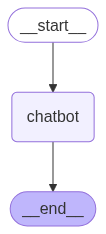

In [25]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [27]:
while True:
    user_input = input("user: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Exiting the chatbot.")
        break
    for event in graph.stream({"messages":("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value["messages"])
            print("bot:", value["messages"].content)  #print the last message in the messages list, which is the response from the chatbot

dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001966517, 'queue_time': 0.160350799, 'total_time': 0.031057426}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--b4f80508-e7ff-45d6-b001-8372f1e705be-0', usage_metadata={'input_tokens': 11, 'output_tokens': 16, 'total_tokens': 27})}])
content='Hello! 👋 \n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001966517, 'queue_time': 0.160350799, 'total_time': 0.031057426}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run--b4f80508-e7ff-45d